In [ ]:
import csv
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading the data
spray = pd.read_csv("/content/drive/My Drive/nndl/spray_sanitized.csv")
concat = pd.read_csv("/content/drive/My Drive/nndl/concat.csv")
concat.drop('Unnamed: 0', axis='columns', inplace=True)

In [ ]:
print(spray.head(10))
print("\n")
print(concat.head(10))
print(len(concat))

   Unnamed: 0  ... Stars
0           0  ...     1
1           1  ...     4
2           2  ...     5
3           3  ...     5
4           4  ...     5
5           5  ...     1
6           6  ...     1
7           7  ...     1
8           8  ...     2
9           9  ...     1

[10 rows x 5 columns]


         Date  ...   Overall
0  2020-05-18  ...  Negative
1  2020-05-15  ...  Positive
2  2020-05-23  ...  Positive
3  2020-05-22  ...  Positive
4  2020-05-14  ...   Neutral
5  2020-05-17  ...   Neutral
6  2020-05-30  ...  Positive
7  2020-05-17  ...  Positive
8  2020-05-18  ...  Positive
9  2020-05-18  ...  Positive

[10 rows x 9 columns]
2559


In [ ]:
neg = concat.loc[concat['Overall']=="Negative"]
print(len(neg))

pos = concat.loc[concat['Overall']=="Positive"]
print(len(pos))

pos_714 = pos.head(len(neg))
print(pos_714)

neu = concat.loc[concat['Overall']=="Neutral"]
print(len(neu))
neu_204 = neu.head(len(neg))
print(neu_204)

stack = pd.concat([neg, pos_714, neu ], axis=0)

714
1449
            Date  ...   Overall
1     2020-05-15  ...  Positive
2     2020-05-23  ...  Positive
3     2020-05-22  ...  Positive
6     2020-05-30  ...  Positive
7     2020-05-17  ...  Positive
...          ...  ...       ...
1137  2020-07-11  ...  Positive
1139  2020-07-11  ...  Positive
1140  2020-07-12  ...  Positive
1142  2020-07-07  ...  Positive
1145  2020-05-29  ...  Positive

[714 rows x 9 columns]
396
            Date  ...  Overall
4     2020-05-14  ...  Neutral
5     2020-05-17  ...  Neutral
34    2020-05-20  ...  Neutral
37    2020-05-20  ...  Neutral
48    2020-05-23  ...  Neutral
...          ...  ...      ...
2529  2020-07-03  ...  Neutral
2534  2020-07-22  ...  Neutral
2535  2020-05-30  ...  Neutral
2545  2020-08-18  ...  Neutral
2557  2020-08-18  ...  Neutral

[396 rows x 9 columns]


In [ ]:
stack

,Date,Review_text,Review_title,Stars,Positive,Negative,Neutral,Compound,Overall
0,2020-05-18,Not same as shown in the picture of product de...,Duplicate????????,1,0.000,0.098,0.902,-0.2411,Negative
15,2020-05-28,The product is fake I have a smaller bottle of...,Duplicate sanitizer,1,0.039,0.271,0.690,-0.9022,Negative
22,2020-05-20,Duplicate sanitizer.There is no typical lifebu...,Fake product,1,0.000,0.268,0.732,-0.2960,Negative
38,2020-07-04,"Bad scent, very different from 60 ml I used ea...",Much different from 60 ml packaging bought in ...,2,0.064,0.220,0.716,-0.7263,Negative
47,2020-07-11,The brand is sufficient to trust the quality. ...,Brand is sufficient,5,0.033,0.040,0.927,-0.1280,Negative
...,...,...,...,...,...,...,...,...,...
2529,2020-07-03,OK_hand,thumbs_up thumbs_up,5,0.000,0.000,1.000,0.0000,Neutral
2534,2020-07-22,One stock was not having a bottle on it,Product delivered in not good condition,1,0.000,0.000,1.000,0.0000,Neutral
2535,2020-05-30,Expensive,Expensive,3,0.000,0.000,1.000,0.0000,Neutral
2545,2020-08-18,Less quantity..better to go for rub or liquid,Quantity less,3,0.000,0.000,1.000,0.0000,Neutral


In [ ]:
from sklearn.utils import shuffle
stack = shuffle(stack)
print(stack)

            Date  ...   Overall
651   2020-05-27  ...  Positive
477   2020-05-18  ...  Positive
641   2020-06-18  ...  Positive
1992  2020-06-20  ...  Negative
1566  2020-08-17  ...  Negative
...          ...  ...       ...
2297  2020-07-16  ...   Neutral
1096  2020-05-20  ...  Negative
939   2020-05-27  ...  Positive
862   2020-08-18  ...  Positive
1117  2020-05-22  ...  Negative

[1824 rows x 9 columns]


In [ ]:
'''
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/drive/My Drive/nndl/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()
'''

'\nfrom numpy import array\nfrom numpy import asarray\nfrom numpy import zeros\n\nembeddings_dictionary = dict()\nglove_file = open(\'/content/drive/My Drive/nndl/glove.6B.100d.txt\', encoding="utf8")\n\nfor line in glove_file:\n    records = line.split()\n    word = records[0]\n    vector_dimensions = asarray(records[1:], dtype=\'float32\')\n    embeddings_dictionary [word] = vector_dimensions\nglove_file.close()\n'

In [ ]:
vocab_size = 5000
embedding_dim = 64
max_length = 1000
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [ ]:
articles = []
labels = []

for i in list(concat["Review_text"]):
    article = str(i)
    for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
    articles.append(article)

for j in list(concat["Overall"]):
    labels.append(j)

print(len(articles))
print(len(labels))

2559
2559


In [ ]:
le = []
for i in articles:
    le.append(len(i))
print(max(le))

995


In [ ]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

2047
2047
2047
512
512


In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'bottle': 8,
 'good': 3,
 'i': 4,
 'it': 6,
 'one': 10,
 'product': 2,
 'sanitizer': 5,
 'the': 7,
 'use': 9}

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_articles)
print(train_sequences[10])

[33, 40, 2, 679, 4, 58, 41, 5, 526, 2, 103, 26, 16, 84, 132, 9, 305, 101, 189, 598, 427, 18, 4, 476, 22, 2]


In [ ]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

11
1000
43
1000
26
1000


In [ ]:
print(train_padded[10])

[ 33  40   2 679   4  58  41   5 526   2 103  26  16  84 132   9 305 101
 189 598 427  18   4 476  22   2   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

In [ ]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

512
(512, 1000)


In [ ]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[2]
[1]
[1]
(2047, 1)
[3]
[3]
[1]
(512, 1)


In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

it's duplicate product bcoz i using brand sanitizer months product totally different smell even u use make little bit burning feeling hand i suggest buy product ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?

In [ ]:
embedding_dim

64

In [ ]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim), # direction of each word learned epoch-by-epoch
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),#, return_sequences=True)),
    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dropout(.5),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          320000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 390       
Total params: 394,694
Trainable params: 394,694
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(set(labels))

{'Positive', 'Negative', 'Neutral'}


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 15
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=1)

Epoch 1/15
64/64 [==============================] - 5s 83ms/step - loss: 1.1999 - accuracy: 0.5276 - val_loss: 0.9489 - val_accuracy: 0.5547
Epoch 2/15
64/64 [==============================] - 5s 74ms/step - loss: 0.7918 - accuracy: 0.6834 - val_loss: 0.6818 - val_accuracy: 0.7031
Epoch 3/15
64/64 [==============================] - 5s 74ms/step - loss: 0.5675 - accuracy: 0.7811 - val_loss: 0.6477 - val_accuracy: 0.7363
Epoch 4/15
64/64 [==============================] - 5s 74ms/step - loss: 0.4297 - accuracy: 0.8476 - val_loss: 0.6150 - val_accuracy: 0.7656
Epoch 5/15
64/64 [==============================] - 5s 75ms/step - loss: 0.3447 - accuracy: 0.8862 - val_loss: 0.6512 - val_accuracy: 0.7852
Epoch 6/15
64/64 [==============================] - 5s 76ms/step - loss: 0.2934 - accuracy: 0.9033 - val_loss: 0.6545 - val_accuracy: 0.7832
Epoch 7/15
64/64 [==============================] - 5s 75ms/step - loss: 0.3203 - accuracy: 0.8989 - val_loss: 0.5982 - val_accuracy: 0.7852
Epoch 8/15
64

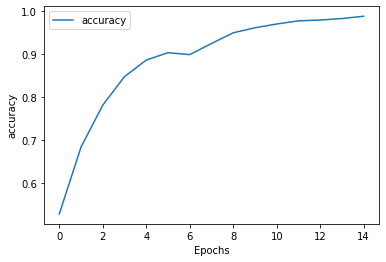

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  #plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")

In [ ]:
#model.save("/content/drive/My Drive/nndl/best_model.hdf5")